In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
from qiskit import execute,transpile
from qiskit import IBMQ

In [2]:
a = "1111"
b = "1111"
rst_cnt = 1

a = a[::-1]
b = b[::-1]

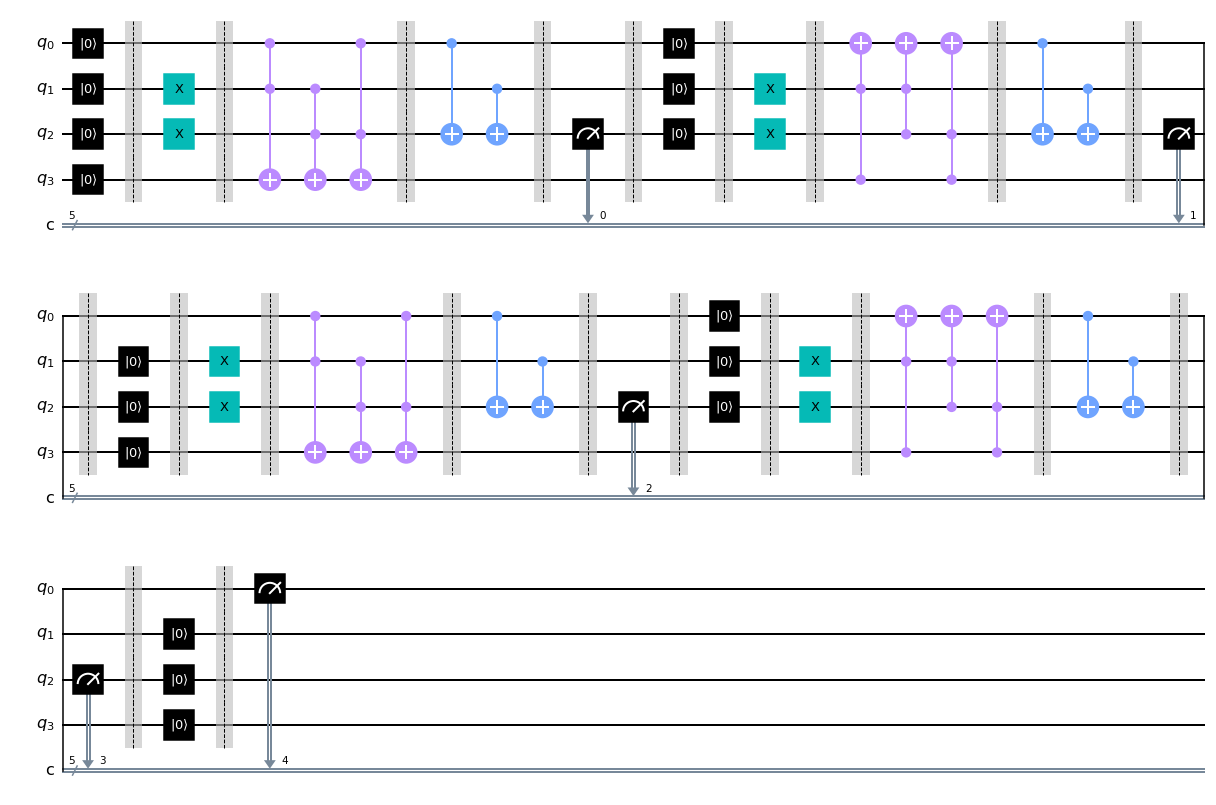

In [3]:
circ = QuantumCircuit(4,len(a)+1)
circ.reset(range(0,4))
circ.barrier()
for i in range(len(a)):

    if(a[i] == "1"):
        circ.x(1)
    if(b[i] == "1"):
        circ.x(2)
    circ.barrier()       

    if(i%2 == 0):  
       circ.ccx(0,1,3)
       circ.ccx(1,2,3)
       circ.ccx(0,2,3)
    else:
       circ.ccx(3,1,0)
       circ.ccx(1,2,0)
       circ.ccx(3,2,0)        

    circ.barrier()

    circ.cx(0,2) #sum - 1cx
    circ.cx(1,2) #sum - 2cx give sum

    circ.barrier()

    circ.measure(2,i) #measure sum over 0th measure bit

    circ.barrier()
  
    for p in range(0,rst_cnt):
       if(i%2 == 0):
          circ.reset(0) #reset the current carry bit for storing next carry
       else:
          circ.reset(3)
       circ.reset(1)
       circ.reset(2)

    circ.barrier()

if(i%2 == 0):
    circ.measure(3,len(a))
else:
    circ.measure(0,len(a))
    
circ.draw()

In [5]:
#backend = Aer.get_backend('qasm_simulator')
#job = execute(circ, backend, shots=500)  # shots default = 1024
#result = job.result()
#print(result.get_counts())
#plot_histogram(result.get_counts())

IBMQ.save_account('6ad660c99fd7054787da3cd13d29873bad4c0c901f2e0653852c11584a8a6398fb47de4b810bceeb78597a9ce3c4b18d198b38f56061a7ef44c67b2742484432', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ncsu', group='nc-state', project='grad-qc-class')
backend = provider.get_backend('ibmq_mumbai')


#backend = Aer.get_backend('aer_simulator')
shots = 4096
job = execute(circ, backend=backend, shots=shots)
results = job.result()
circ = transpile(circ, backend)
result = backend.run(circ).result()
counts = results.get_counts()

ibmqfactory.load_account:WARNING:2022-11-05 22:58:03,296: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
plot_histogram(counts, title='Bell-State counts')